Yêu cầu vẽ biểu đồ kết hợp để:</br>
- Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.
- So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồng thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).
- Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích.

# 0. Khai báo các thư viện cần thiết

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Đọc dữ liệu từ file EXCEL

In [ ]:
df = pd.read_excel("https://s3.ap-southeast-1.amazonaws.com/learn.codegym.vn/media/public/2022/01/08185826/house_price_do%CC%82%CC%81ng-da.xlsx")
df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1000 non-null   object        
 1   address            1000 non-null   object        
 2   area               994 non-null    float64       
 3   price              944 non-null    float64       
 4   postDate           1000 non-null   datetime64[ns]
 5   land_certificate   693 non-null    object        
 6   house_direction    44 non-null     object        
 7   balcony_direction  24 non-null     object        
 8   toilet             551 non-null    float64       
 9   bedroom            635 non-null    float64       
 10  floor              376 non-null    float64       
 11  type_of_land       1000 non-null   object        
 12  street_name        808 non-null    object        
 13  ward_name          802 non-null    object        
 14  district_

# 2. Xử lý dữ liệu khuyết thiếu và dữ liệu ngoại lai

- 2.1. Xử ly dữ liệu khuyết thiếu

In [ ]:
# Lọc các dữ liệu cần thiết của cột "area", "price", "bedroom", "toilet", "type_of_land"
df1 = df.loc[:, ["area", "price", "bedroom", "toilet", "type_of_land"]]
df.head()

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          994 non-null    float64
 1   price         944 non-null    float64
 2   bedroom       635 non-null    float64
 3   toilet        551 non-null    float64
 4   type_of_land  1000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
# Xoá các dòng dữ liệu không có dữ liệu area và price
df1.dropna(subset = ["area", "price"], inplace = True)

In [ ]:
# Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột
df1 = df1.interpolate(method = "linear", axis = 0).ffill().bfill()
df1 = df1.round(0)

In [ ]:
df1["type_of_land"].replace('Bán nhà riêng\n ', 'Bán nhà riêng', inplace = True)
df1["type_of_land"].replace('Bán nhà mặt phố\n ', 'Bán nhà mặt phố', inplace = True)
df1["type_of_land"].replace('Bất động sản khác\n ', 'Bất động sản khác', inplace = True)
df1["type_of_land"].unique()

array(['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư'], dtype=object)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          942 non-null    float64
 1   price         942 non-null    float64
 2   bedroom       942 non-null    float64
 3   toilet        942 non-null    float64
 4   type_of_land  942 non-null    object 
dtypes: float64(4), object(1)
memory usage: 44.2+ KB


- 2.1. Xử lý giá trị ngoại lai theo phương pháp Z-Score

In [ ]:
# Xoá các dòng có dữ liệu area bằng 0
df1 = df1[df1.area > 0]
df1.reset_index(drop=True, inplace=True)

In [ ]:
z = np.abs(stats.zscore(df1.area))

In [ ]:
threshold = 1.0
index = np.where((z > 2 * z.min()) & (z < threshold))

In [ ]:
df2 = df1.loc[index[0], :]

In [ ]:
df2["UnitPrice"] = df2.price / df2.area

In [ ]:
df2.area.min()

6.0

# 3. Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
 5   UnitPrice     912 non-null    float64
dtypes: float64(5), object(1)
memory usage: 49.9+ KB


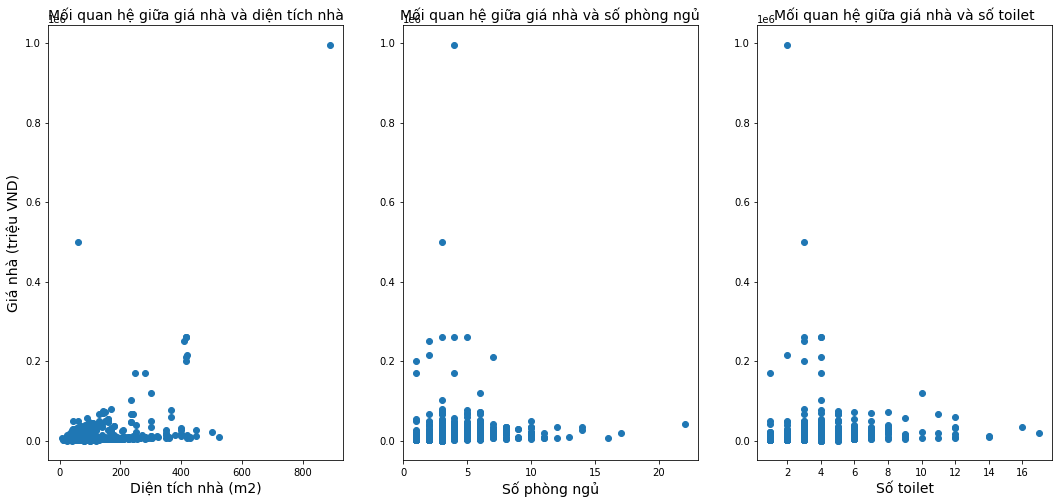

In [ ]:
# Chia đồ thị làm 3 phần nằm ngang
fig, ax = plt.subplots(1, 3)
fig.set_figheight(8)
fig.set_figwidth(18)

# Vẽ đồ thị mối quan hệ giữa giá nhà và diện tích nhà
ax[0].scatter(df2.area, df2.price)
ax[0].set_title("Mối quan hệ giữa giá nhà và diện tích nhà", fontsize = 14)
ax[0].set_xlabel("Diện tích nhà (m2)", fontsize = 14)
ax[0].set_ylabel("Giá nhà (triệu VND)", fontsize = 14)

# Vẽ đồ thị mối quan hệ giữa số phòng ngủ với giá nhà
ax[1].scatter(df2.bedroom, df2.price)
ax[1].set_title("Mối quan hệ giữa giá nhà và số phòng ngủ", fontsize = 14)
ax[1].set_xlabel("Số phòng ngủ", fontsize = 14)

# Vẽ đồ thị mối quan hệ giữa số phòng toilet với giá nhà
ax[2].scatter(df2.toilet, df2.price)
ax[2].set_title("Mối quan hệ giữa giá nhà và số toilet", fontsize = 14)
ax[2].set_xlabel("Số toilet", fontsize = 14)

plt.show()

# 4. So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồng thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà(type_of_land)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
 5   UnitPrice     912 non-null    float64
dtypes: float64(5), object(1)
memory usage: 49.9+ KB


In [ ]:
df2.type_of_land.unique()

array(['Bán nhà riêng', 'Bán nhà mặt phố', 'Tập thể, cư xá', 'Chung cư',
       'Bất động sản khác', 'Đất thổ cư'], dtype=object)

In [ ]:
# Tính giá trị trung bình trên m2 giữa các hình thức nhà
df3 = df2.groupby(["type_of_land"]).mean()
df3.reset_index(inplace = True)
df3

,type_of_land,area,price,bedroom,toilet,UnitPrice
0,Bán nhà mặt phố,110.333333,41057.587963,4.550926,4.541667,356.538095
1,Bán nhà riêng,101.412523,8275.114180,3.998158,4.027624,120.288530
2,Bất động sản khác,137.611111,22265.000000,4.500000,4.333333,209.912825
3,Chung cư,61.655172,1950.000000,1.827586,1.431034,26.623608
4,"Tập thể, cư xá",66.101449,2094.637681,2.043478,1.420290,33.353309
5,Đất thổ cư,80.750000,10585.000000,4.125000,3.625000,133.153612


In [ ]:
# Tổng số bài đăng giữa các hình thức nhà
df4 = df2.groupby(["type_of_land"]).count()
df4.reset_index(inplace = True)
df4

,type_of_land,area,price,bedroom,toilet,UnitPrice
0,Bán nhà mặt phố,216,216,216,216,216
1,Bán nhà riêng,543,543,543,543,543
2,Bất động sản khác,18,18,18,18,18
3,Chung cư,58,58,58,58,58
4,"Tập thể, cư xá",69,69,69,69,69
5,Đất thổ cư,8,8,8,8,8


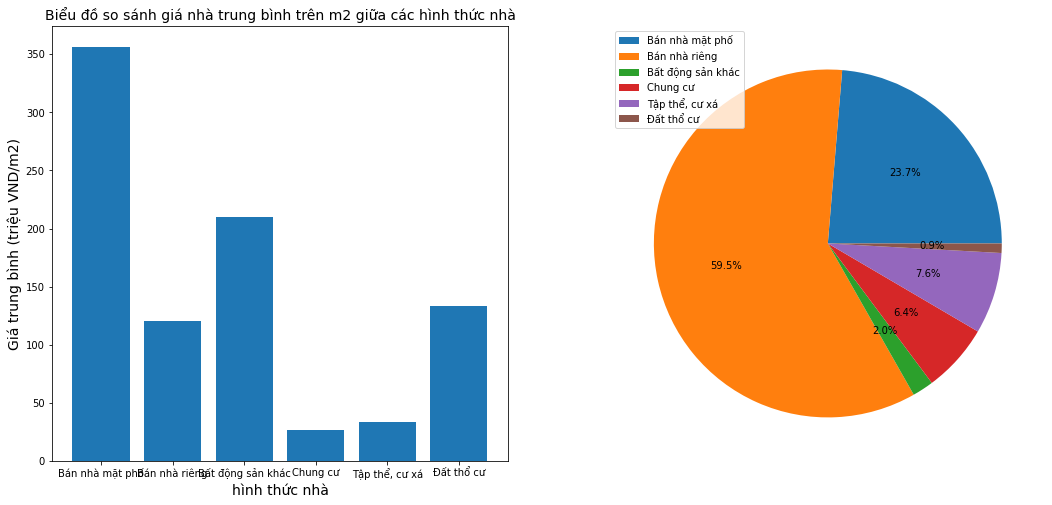

In [ ]:
# Vẽ biểu đồ
# Chia đồ thị làm 2 phần nằm ngang
fig, ax = plt.subplots(1, 2)
fig.set_figheight(8)
fig.set_figwidth(18)

# Vẽ đồ thị so sánh giá nhà trung bình trên m2 giữa các hình thức nhà
ax[0].bar(df3.type_of_land, df3.UnitPrice)
ax[0].set_title("Biểu đồ so sánh giá nhà trung bình trên m2 giữa các hình thức nhà", fontsize = 14)
ax[0].set_xlabel("hình thức nhà", fontsize = 14)
ax[0].set_ylabel("Giá trung bình (triệu VND/m2)", fontsize = 14)

# Vẽ đồ thị mối quan hệ giữa số phòng ngủ với giá nhà
# Vẽ đồ thị thể hiện tỷ trọng GDP các nước
ax[1].pie(df4.UnitPrice, autopct = '%1.1f%%')
ax[1].legend(labels = df4.type_of_land)

plt.show()

# 5. Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 912 entries, 0 to 925
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          912 non-null    float64
 1   price         912 non-null    float64
 2   bedroom       912 non-null    float64
 3   toilet        912 non-null    float64
 4   type_of_land  912 non-null    object 
 5   UnitPrice     912 non-null    float64
dtypes: float64(5), object(1)
memory usage: 49.9+ KB


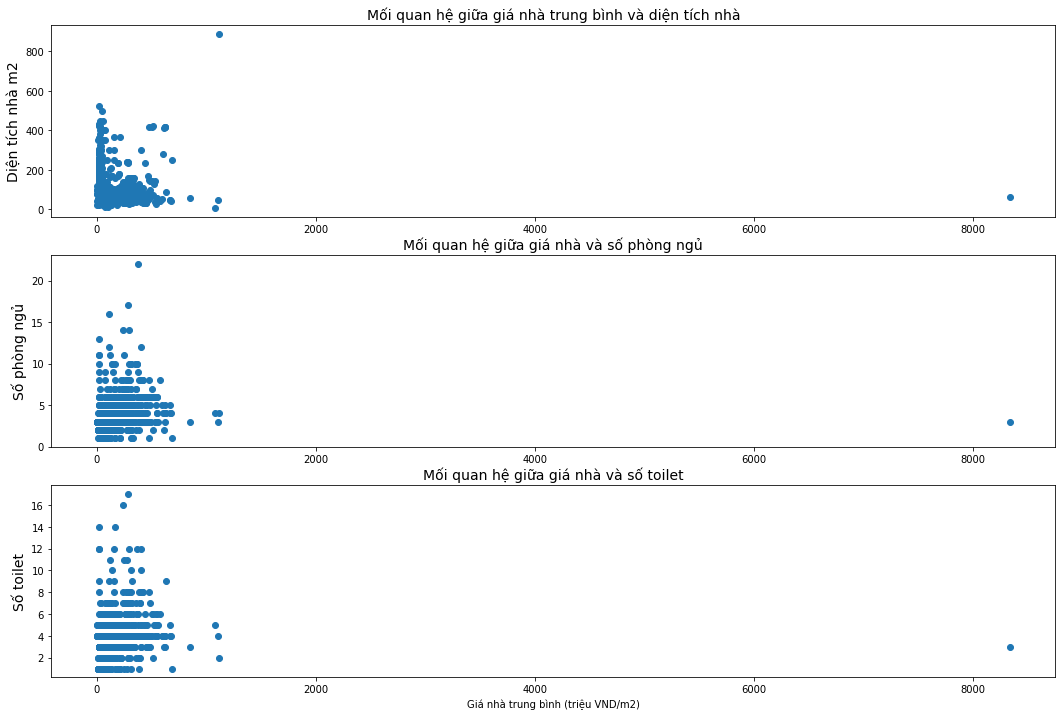

In [ ]:
# Chia đồ thị làm 3 phần dọc
fig, ax = plt.subplots(3, 1)
fig.set_figheight(12)
fig.set_figwidth(18)

# Vẽ đồ thị mối quan hệ giữa giá nhà trung bình theo m2 và diện tích nhà
ax[0].scatter(df2.UnitPrice, df2.area)
ax[0].set_title("Mối quan hệ giữa giá nhà trung bình và diện tích nhà", fontsize = 14)
ax[0].set_ylabel("Diện tích nhà m2", fontsize = 14)

# Vẽ đồ thị mối quan hệ giữa giá nhà trung bình theo m2 và số phòng ngủ
ax[1].scatter(df2.UnitPrice, df2.bedroom)
ax[1].set_title("Mối quan hệ giữa giá nhà và số phòng ngủ", fontsize = 14)
ax[1].set_ylabel("Số phòng ngủ", fontsize = 14)

# Vẽ đồ thị mối quan hệ giữa giá nhà trung bình theo m2 theo số toilet
ax[2].scatter(df2.UnitPrice, df2.toilet)
ax[2].set_title("Mối quan hệ giữa giá nhà và số toilet", fontsize = 14)
ax[2].set_ylabel("Số toilet", fontsize = 14)
ax[2].set_xlabel("Giá nhà trung bình (triệu VND/m2)")

plt.show()